In [38]:
# !pip install opencv-python
# !pip install matplotlib
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)


# Матчинг изображений

In [1]:
import cv2
from pathlib import Path
from glob import glob
import matplotlib.pyplot as plt

data_path = Path('/home/d_korostelev/Projects/super_resolution/Real-ESRGAN/datasets/real/rgb/sandstone')

lr_path = data_path / '1x'
hr_path = data_path / '5x'

lr_images = list(lr_path.glob('*'))
hr_images = list(hr_path.glob('*'))
len(lr_images), len(hr_images)

(1268, 259)

(3584, 3584, 3) (6464, 6464, 3)


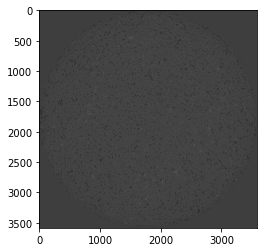

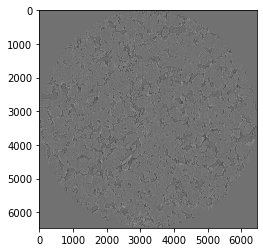

In [60]:
for lr, hr in zip(lr_images, hr_images):
    lr_image = cv2.imread(str(lr))
    hr_image = cv2.imread(str(hr))
    print(lr_image.shape, hr_image.shape)
    plt.figure()
    plt.imshow(lr_image)
    plt.figure()
    plt.imshow(hr_image)
    break

In [54]:
import numpy as np
from tqdm import tqdm

lr_size = 1024
hr_size = 6464

def metric_func(img1, img2):
    img1 = img1[:, :, 0]
    img2 = img2[:, :, 0]
    # mse: np.sqrt(np.sum(np.power(img1 - img2, 2)))
    return np.sum(np.abs(img1 - img2))


for hr in hr_images:
    hr_image = cv2.imread(str(hr))
    hr_image = cv2.resize(hr_image, (lr_size, lr_size))
    distance = []
    for ind, lr in tqdm(enumerate(lr_images)):
        lr_image = cv2.imread(str(lr))
        distance.append(metric_func(lr_image, hr_image))
    break

530it [00:07, 67.90it/s]


(array([  3., 154., 302.,  13.,   7.,   2.,  13.,  11.,   9.,  16.]),
 array([1.56699379e+08, 1.61530986e+08, 1.66362592e+08, 1.71194199e+08,
        1.76025806e+08, 1.80857412e+08, 1.85689019e+08, 1.90520626e+08,
        1.95352233e+08, 2.00183839e+08, 2.05015446e+08]),
 <BarContainer object of 10 artists>)

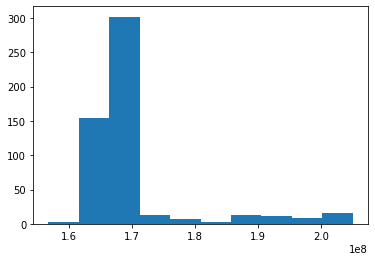

In [55]:
plt.hist(distance)

In [56]:
candidate = cv2.imread(str(lr_images[np.argmin(distance)]))

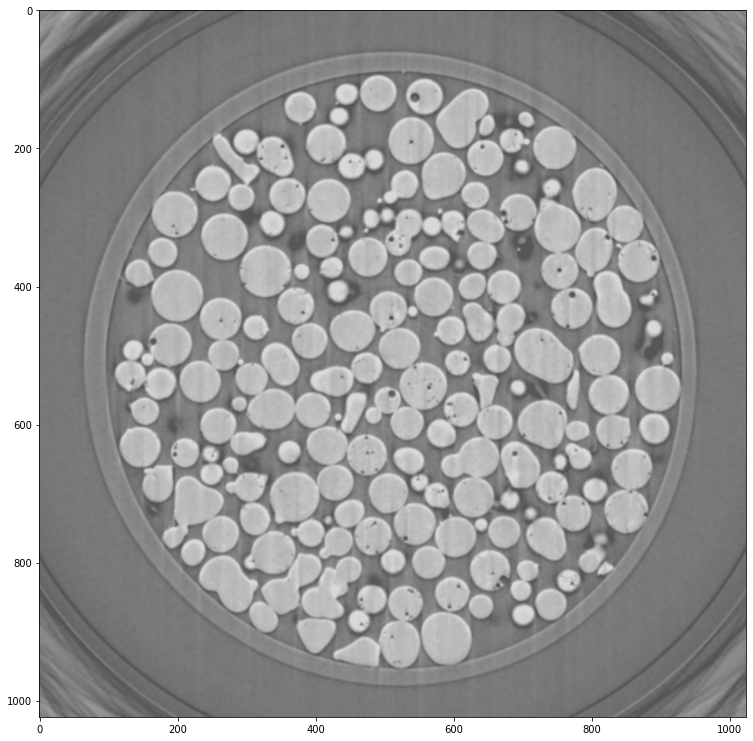

In [57]:
plt.figure(figsize=(13, 13))
plt.imshow(candidate)

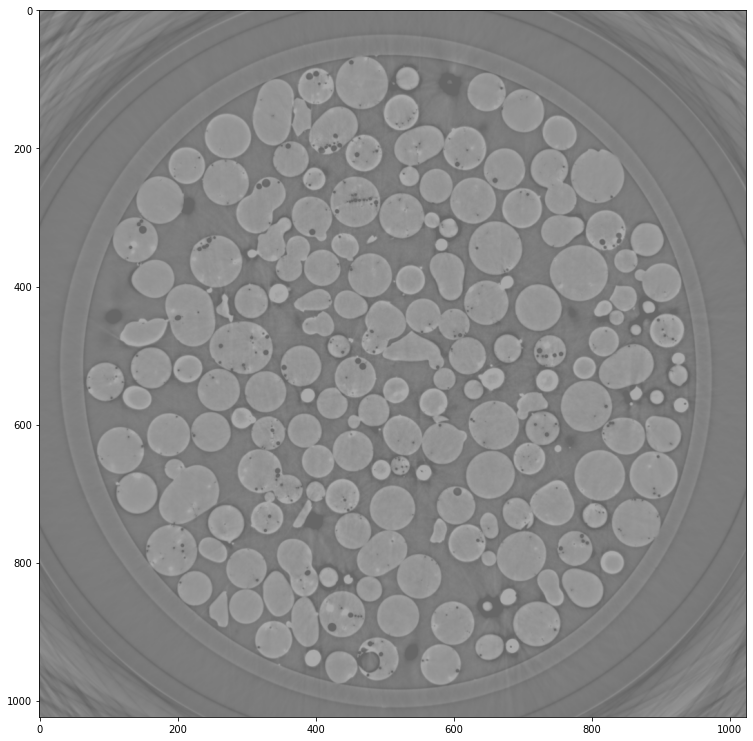

In [58]:
plt.figure(figsize=(13, 13))
plt.imshow(hr_image)

# Glass predictions

In [3]:
import cv2
from pathlib import Path
from glob import glob
import matplotlib.pyplot as plt

data_path = Path('/home/d_korostelev/Projects/super_resolution/Real-ESRGAN/datasets/real/rgb/glass')

lr_path = Path('/home/d_korostelev/Projects/super_resolution/Real-ESRGAN/datasets/real/rgb/glass/1x')
sr_path = Path('/home/d_korostelev/Projects/super_resolution/Real-ESRGAN/predictions/real/glass/1x')

lr_images = list(lr_path.glob('*'))
sr_images = list(sr_path.glob('*'))
len(lr_images), len(sr_images)

(530, 185)

/home/d_korostelev/Projects/super_resolution/Real-ESRGAN/datasets/real/rgb/glass/1x/recon_00000.png /home/d_korostelev/Projects/super_resolution/Real-ESRGAN/predictions/real/glass/1x/recon_00000_out.png
(1024, 1024, 3) (4096, 4096, 3)


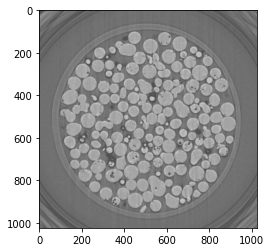

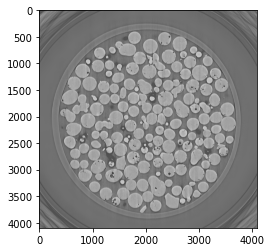

In [4]:
for lr, sr in zip(lr_images, sr_images):
    print(lr, sr)
    lr_image = cv2.imread(str(lr))
    sr_image = cv2.imread(str(sr))
    print(lr_image.shape, sr_image.shape)
    plt.figure()
    plt.imshow(lr_image)
    plt.figure()
    plt.imshow(sr_image)
    break

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import PIL


def plot_results(img, region, prefix, title, save=False):
    """Plot the result with zoom-in area."""
    img_array = img
    img_array = img_array.astype("float32")

    # Create a new figure with a default 111 subplot.
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(img_array[::-1], origin="lower", cmap='gray')

    plt.title(title)
    # zoom-factor: 2.0, location: upper-left
    axins = zoomed_inset_axes(ax, 2, loc=2)
    axins.imshow(img_array[::-1], origin="lower", cmap='gray')

    # Specify the limits.
    x1, x2, y1, y2 = region
    # Apply the x-limits.
    axins.set_xlim(x1, x2)
    # Apply the y-limits.
    axins.set_ylim(y1, y2)

    plt.yticks(visible=False)
    plt.xticks(visible=False)

    # Make the line.
    mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="blue")
    if save:
        plt.savefig(str(prefix) + "-" + title + ".png", bbox_inches='tight')
    plt.show()

def plot_pair(lr_image, sr_image, resize_lr=True, r_start=(500, 500), r_size=500): 
    
    sr_size = sr_image.shape[0]
    if resize_lr:
        lr_image = cv2.resize(lr_image, (sr_size, sr_size))
    
    region = (r_start[0], r_start[0] + r_size, r_start[1], r_start[1] + r_size)
    
    plot_results(lr_image[:, :, 0], region, '512', 'Low Resolution')
    plot_results(sr_image[:, :, 0], region, '512', 'SR Resolution')


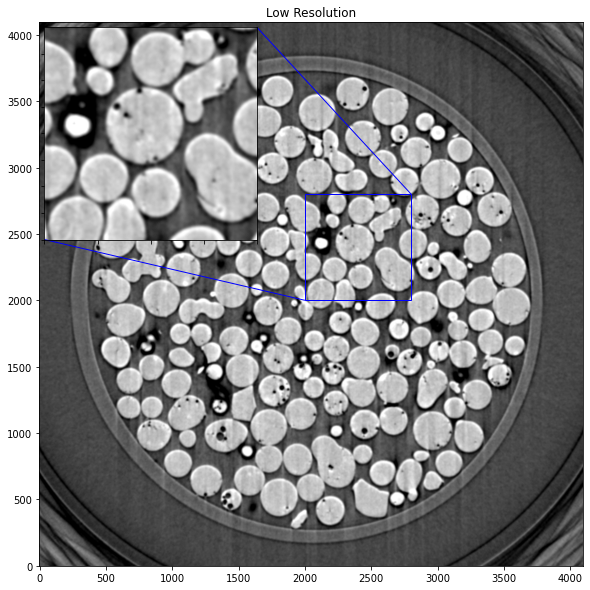

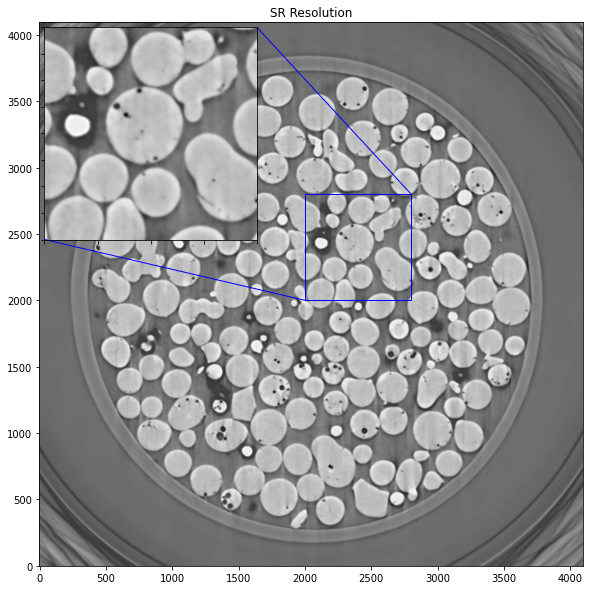

In [6]:
plot_pair(lr_image, sr_image, r_start=(2000, 2000), r_size=800)

# Sandstone predictions

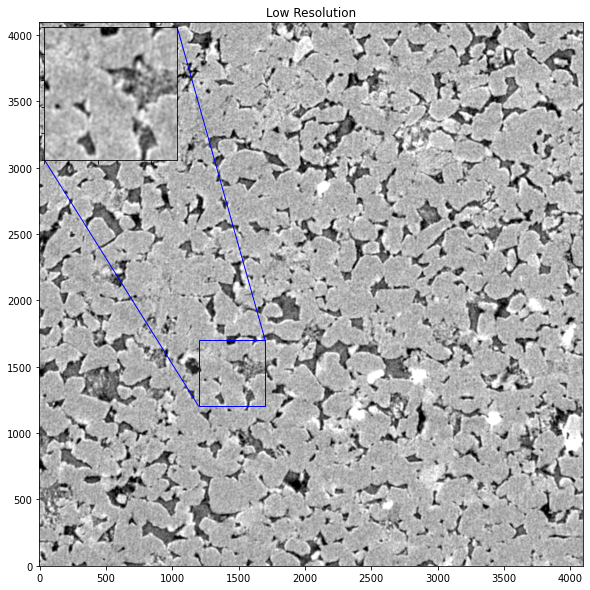

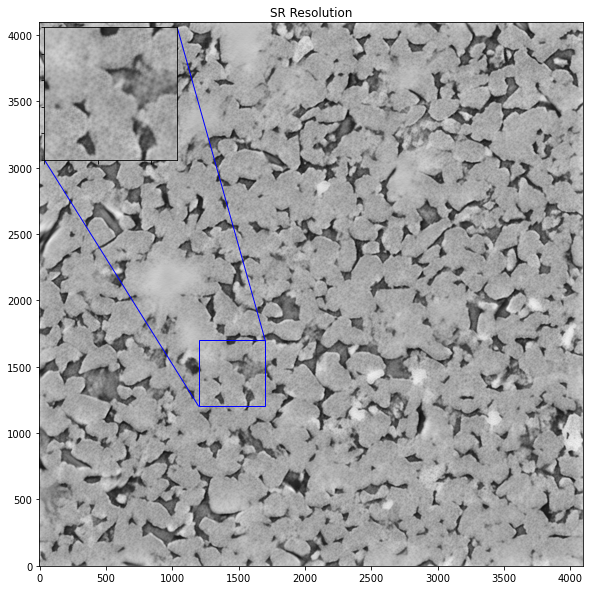

In [9]:
lr_image = cv2.imread('recon_00000_s010.png')
sr_image = cv2.imread('recon_00000_s010_out.png')
plot_pair(lr_image, sr_image, r_start=(1200, 1200), r_size=500)

# Sandstone fast (with benchmark model)

In [ ]:
import numpy as np


def tiff2rgb(image: np.ndarray) -> np.ndarray:
    """"
    Perform min-max percentile normalization
    Min-max normalization and 1 %, 99 % percentile clipping
    """
    min_v = image.min()
    max_v = image.max()
    image = (image - min_v) / (max_v - min_v + 1e-16)

    min_p = np.percentile(image, 1, axis=(0, 1))
    max_p = np.percentile(image, 99, axis=(0, 1))
    image = np.clip(image, min_p, max_p)

    return np.clip((image * 255.0).round(), 0, 255)

lr_image = tiff2rgb(cv2.imread('recon_00000.png'))
sr_image = tiff2rgb(cv2.imread('recon_00000_out.png'))


# plot_pair(lr_image, sr_image, r_start=(1200, 1200), r_size=500)